<a href="https://colab.research.google.com/github/Karlajack/MachineLearning1/blob/main/housepoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
## import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno
##import from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR,SVR,NuSVR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings(action="ignore")





In [3]:
# importing the data

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [111]:
train.info()

**Exploring Missigness**

In [ ]:
train.shape

(1460, 81)

In [ ]:
Total_missing=train.isnull().sum().sort_values(ascending=False)
Total_missing

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

Text(0.5, 1.0, 'missingness values')

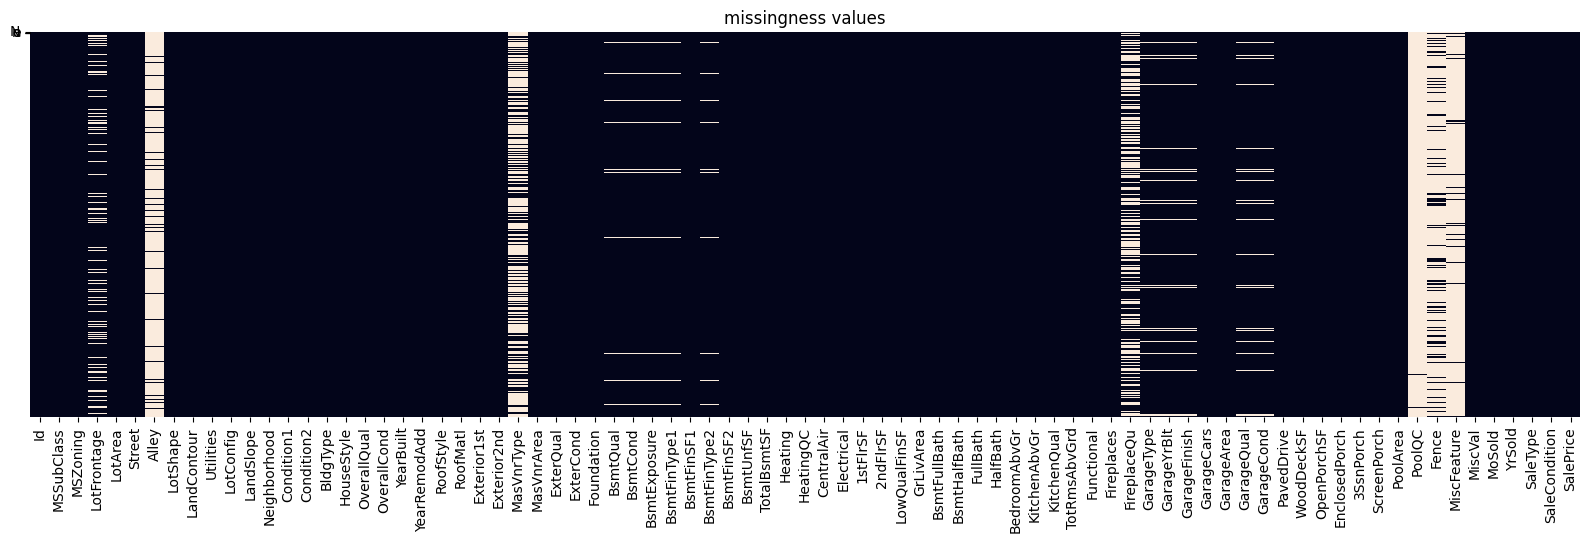

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

In [ ]:
Total=train.isnull().count().sort_values(ascending=False)
Total

Id             1460
CentralAir     1460
GarageYrBlt    1460
GarageType     1460
FireplaceQu    1460
               ... 
MasVnrArea     1460
MasVnrType     1460
Exterior2nd    1460
Exterior1st    1460
SalePrice      1460
Length: 81, dtype: int64

In [ ]:
percent=Total_missing/Total*100
percent

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley           93.767123
BedroomAbvGr     0.000000
                  ...    
Utilities        0.000000
WoodDeckSF       0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
YrSold           0.000000
Length: 81, dtype: float64

In [ ]:



missing=pd.concat([Total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)

missing.index.name='variable'

missing=missing[missing['total_missing']>0]
missing.head(2)




,total_missing,percentage_missing
variable,,
PoolQC,1453,99.520548
MiscFeature,1406,96.301370


<Figure size 2000x2000 with 0 Axes>

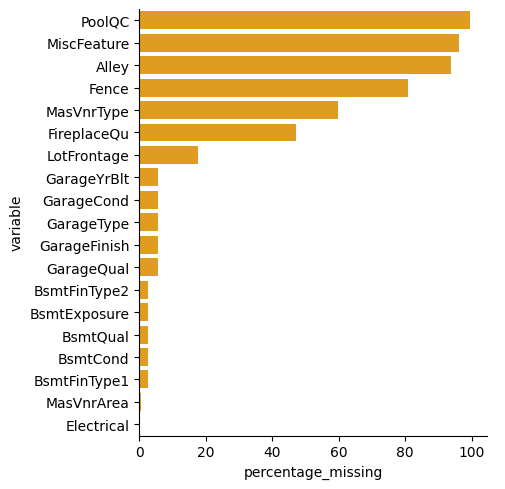

In [ ]:
## plot now
plt.figure(figsize=(20,20))
ax=sns.catplot(y='variable',x='percentage_missing',data=missing,kind='bar',color='orange')

In [ ]:
train.columns[train.isnull().sum().sort_values(ascending=False)>0]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond'],
      dtype='object')

In [ ]:
train.shape

(1460, 81)

In [18]:
# change the column names to lower case
train.columns=map(str.lower,train.columns)
# data.columns = [x.lower() for x in data.columns] #would also suffice
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


Explore all the categorical variables

In [98]:
## Data preparation
#Missingess
#imputing categorical values with mode
categorical_cols=train.select_dtypes(include=['object']).columns
train[categorical_cols]=train[categorical_cols].fillna(train[categorical_cols].mode().iloc[0])
train[categorical_cols].head()
#imputing numerical values with Median
numerical_cols=train.select_dtypes(include=['float64','int64']).columns
train[numerical_cols]=train[numerical_cols].fillna(train[numerical_cols].median())
train[numerical_cols].head()
train[numerical_cols].columns






Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [66]:
train.isnull().sum().sort_values(ascending=False)

id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64

In [111]:
train.info()

# Exploring Outliers

In [111]:

cols_to_plot=train['saleprice']
cols_to_plot

fig,axes=plt.subplots(ncols=len(cols_to_plot))
for i,j in zip(cols_to_plot,axes):
  sns.boxplot(data=train(i),ax=j,color='Maroon')
  j.set_title(i)

  plt.tight_layout()
  plt.show()


In [32]:
train[categorical_cols].head(2)

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


# **Label encoding**

In [42]:
le=LabelEncoder()
cat_encoded=train[categorical_cols].apply(le.fit_transform)
cat_encoded.head(2)



,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
1,3,1,0,3,3,0,2,0,24,1,...,1,1,4,4,2,2,2,2,8,4


In [55]:
train_df=pd.concat([train[numerical_cols],cat_encoded],axis=1)
train_df.shape

(1460, 81)

In [67]:
train_df.head(2)


,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,1,4,4,2,2,2,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1,4,4,2,2,2,2,8,4


**# #Data Separation into the X and Y matrices**

In [68]:
x=train_df.drop('saleprice',axis=1)
y=train_df['saleprice']

**Scaling**

In [69]:
scaler=StandardScaler() #MinMaxScaler
scaler.fit_transform(x)

array([[-1.73086488,  0.07337496, -0.22087509, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [-1.7284922 , -0.87256276,  0.46031974, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [-1.72611953,  0.07337496, -0.08463612, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       ...,
       [ 1.72611953,  0.30985939, -0.1754621 , ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [ 1.7284922 , -0.87256276, -0.08463612, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [ 1.73086488, -0.87256276,  0.23325479, ...,  0.03948531,
         0.31386709,  0.2085023 ]])

In [72]:
pd.DataFrame(scaler.fit_transform(x),columns=x.columns).head(3)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.049718,0.250362,0.039485,0.313867,0.208502
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.049718,0.250362,0.039485,0.313867,0.208502
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.049718,0.250362,0.039485,0.313867,0.208502


## **Separate training ans test sets**

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1022, 80) (438, 80) (1022,) (438,)


# **Fitting Regression models**

# **Simple Linear Regression**

In [82]:
model_reg=LinearRegression()
model_reg.fit(x_train,y_train)
y_hat=model_reg.predict(x_test)
r2_score(y_test,y_hat)



0.863279482518591

# **Randomforestregressor**

In [83]:
from sklearn.ensemble import RandomForestRegressor
model_reg1=RandomForestRegressor()
model_reg1.fit(x_train,y_train)
y_hat=model_reg1.predict(x_test)
r2_score(y_test,y_hat)


0.8750156542303634

# **Ridge Regression**

In [90]:

model_reg2=Ridge()
model_reg2.fit(x_train,y_train)
y_hat=model_reg2.predict(x_test)
r2_score(y_test,y_hat)

0.8634984295450692

# **Lasso Regression**

In [91]:

model_reg2=Lasso()
model_reg2.fit(x_train,y_train)
y_hat=model_reg2.predict(x_test)
r2_score(y_test,y_hat)

0.8633008305333502

continous numerical variables

In [8]:
temporal_vars=[x for x in train.columns if 'yr' in x or  'year' in x]
temporal_vars

[]

In [9]:
['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

In [11]:
numerical_columns=train.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
discrete=[x for x in numerical_columns if len(train[x].unique())<25] # get all the discrete variables in the datase
continous_numerical=[x for x in numerical_columns if x not in temporal_vars+["id"] and x not in discrete]
print("there are {} continous variables in this dataset".format(len(continous_numerical)))

there are 20 continous variables in this dataset


explore the relationship of these continous variables with selling price

In [13]:
train[continous_numerical].head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000


explore the relationship of these continous variables with selling price

In [ ]:
train[continous_numerical].corr()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,1.000000,-0.009921,-0.033226,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,0.008273,-0.000122,0.017634,-0.029643,-0.000477,0.002889,0.001330,-0.021917
LotFrontage,-0.009921,1.000000,0.304522,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.368007,0.062996,0.323511,0.075542,0.137014,0.010287,0.037655,0.334771
LotArea,-0.033226,0.304522,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,-0.025865,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
YearBuilt,-0.012713,0.116685,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,0.199010,0.777182,0.478954,0.224880,0.188686,-0.387268,-0.050364,0.522897
YearRemodAdd,-0.021998,0.083348,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,0.287389,0.616444,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.507101
MasVnrArea,-0.051071,0.178469,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.244444,0.370884,0.159991,0.122528,-0.109907,0.062248,0.472614
BsmtFinSF1,-0.005024,0.214367,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.148782,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
BsmtFinSF2,-0.005968,0.042463,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.087684,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
BsmtUnfSF,-0.007940,0.124098,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.185610,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
TotalBsmtSF,-0.015415,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.309386,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581


In [ ]:
corr_df=train[continous_numerical].corr()
corr_df.head()
corr_df.nlargest(5,'SalePrice')

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
SalePrice,-0.021917,0.334771,0.263843,0.522897,0.507101,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,0.708624,0.466754,0.623431,0.324413,0.315856,-0.128578,0.111447,1.000000
GrLivArea,0.008273,0.368007,0.263116,0.199010,0.287389,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.219801,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624
GarageArea,0.017634,0.323511,0.180403,0.478954,0.371600,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,0.468997,0.468804,1.000000,0.224666,0.241435,-0.121777,0.051412,0.623431
TotalBsmtSF,-0.015415,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.309386,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.010496,0.413773,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.224897,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


In [ ]:
corr_df['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
BsmtFinSF2      -0.011378
Id              -0.021917
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

<Axes: >

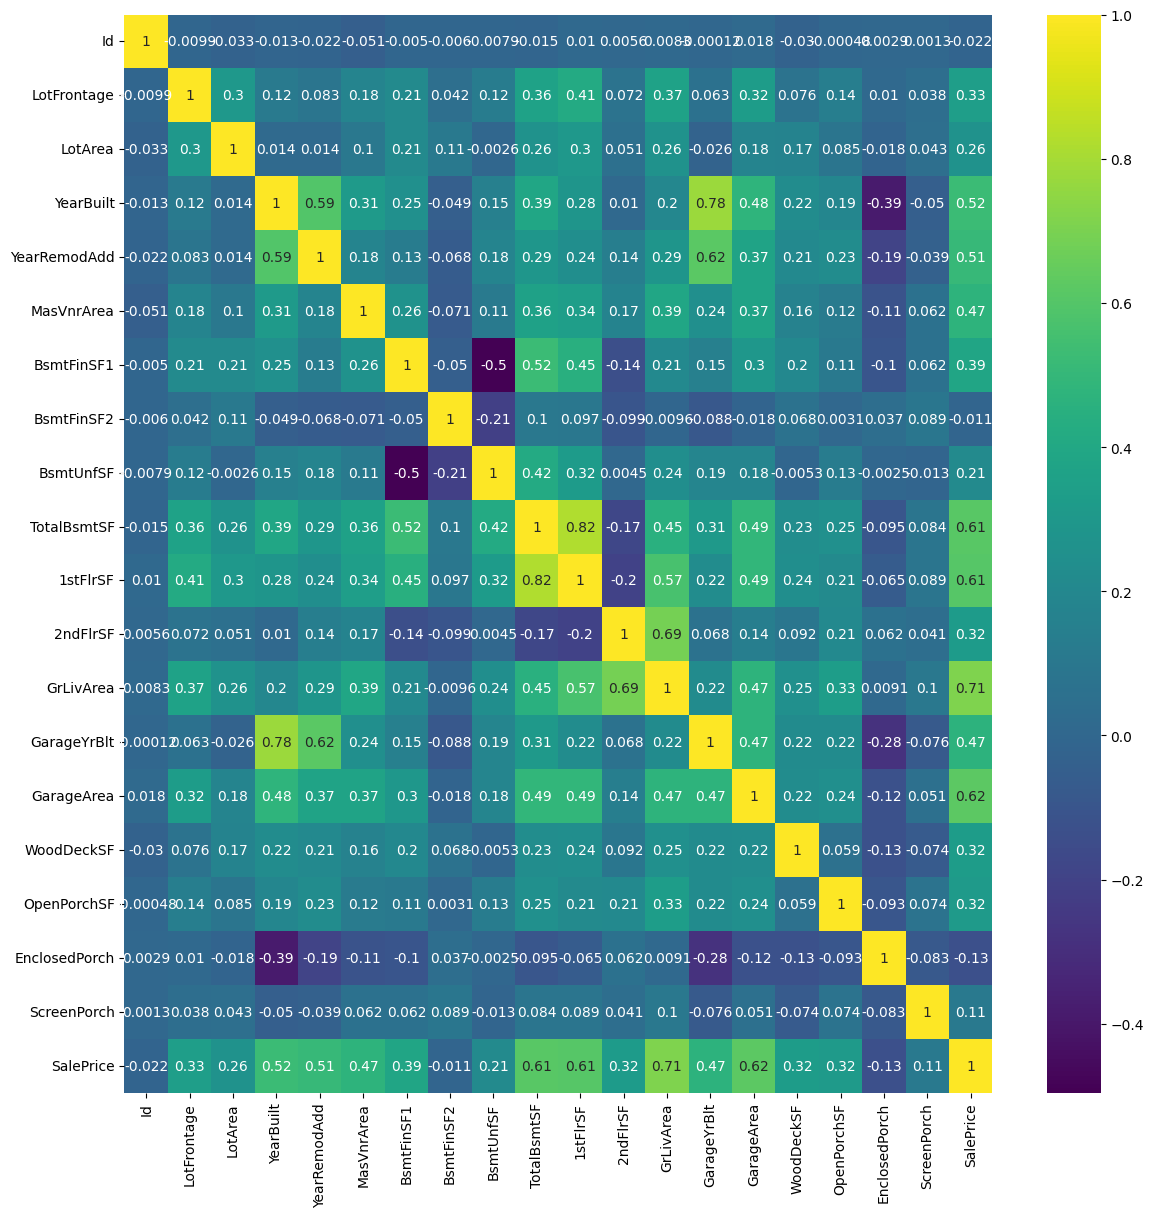

In [ ]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr_df,annot=True,cmap='viridis')

In [ ]:
# those with high correlation with saleprice
cols=corr_df.nlargest(10,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1'],
      dtype='object')

<Axes: >

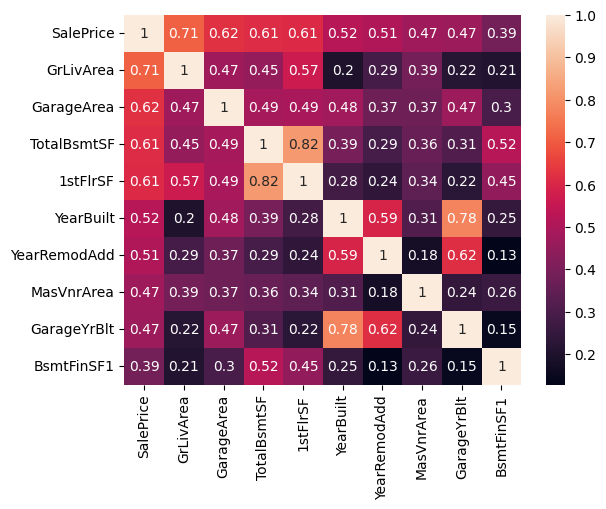

In [ ]:
corrmap=np.corrcoef(train[cols].values.T)
sns.heatmap(corrmap,annot=True,xticklabels=cols.values,yticklabels=cols.values)

In [16]:
explore the relationship between the discrete variables and selling price

In [20]:
train['mssubclass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [22]:
train[discrete].head()

KeyError: "None of [Index(['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF',\n       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',\n       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',\n       'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],\n      dtype='object')] are in the [columns]"

In [ ]:
def plot():
    for var in discrete:

        if not var=='mssubclass'or not var=='3ssnporch':
            train.groupby(var)['saleprice'].mean().plot.bar(color='tan')
            plt.ylabel('selling price of house')
            plt.title(var)
            plt.grid(True)
            plt.show()

In [ ]:
plot()

how the temporal variables relate to selling price

In [ ]:
temporal_vars

In [ ]:
fig = plt.figure(figsize=(12,18))
def plt_temporal():
    for var in temporal_vars:
        if not var=='yrsold':
            plt.scatter(x=train[var],y=train['saleprice'],c='red')
            plt.ylabel('selling price')
            plt.title(var.upper())
            plt.show()
plt_temporal()

Outliers

In [ ]:
# identify then plot
# univariate
# multivariate
# remove them
# do a box plots for the numerical vars
# fig = plt.figure(figsize=(16,20))
# for i in range(len(numerical.columns)):
#     fig.add_subplot(9, 4, i+1)
#     for var in numerical:
#         sns.boxplot(numerical[var])
# plt.show()
continous_df=numerical[continous_numerical]# get the contious variables data frame

fig=plt.figure(figsize=(16,20))
for var in range(len(continous_df.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=continous_df.iloc[:,var],color="cyan")
plt.tight_layout()
plt.show()

It states that a data point is an outlier if:
It is below the First Quadrant (Q1) subtracted by (1.5 x IQR)
It is above the Third Quadrant (Q3) added by (1.5 x IQR)

In [ ]:
## bivaraite outlier analysis
for var in continous_df:
    if not var=='id'and var!='saleprice':
        sns.scatterplot(x=continous_df[var],y=continous_df['saleprice'])
        plt.title(var.upper())
        plt.show()

### **Regression**

In [28]:
train[categorical_cols].tail(2)

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1459,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [27]:
train[numerical_cols].tail(2)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830,...,736,68,0,0,0,0,0,6,2008,147500
